## Análisis y construcción del modelo de Árboles de Decisión para el dataset del Titanic.

## Librería a usar

In [88]:
import pandas as pd # Manipular dataset
import matplotlib.pyplot as plt #Visualización de datos 
import seaborn as sns
from sklearn.model_selection import train_test_split #Entrenar el modelo
from sklearn.tree import DecisionTreeClassifier #Configurar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Métricas para evañuar el modelo
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

## 1. Análisis Exploratorio de Datos (EDA)

In [91]:
data = pd.read_csv('./Titanic-Dataset.csv') #Cargar el dataset
data.head(20) #Mostrar las primeras filas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [93]:
data.info() #Mostrar información general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
data.describe() #Se realiza la estadística descriptiva

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
data1=data.drop((['Name','Sex','Ticket','Cabin','Embarked']), axis=1)
data1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


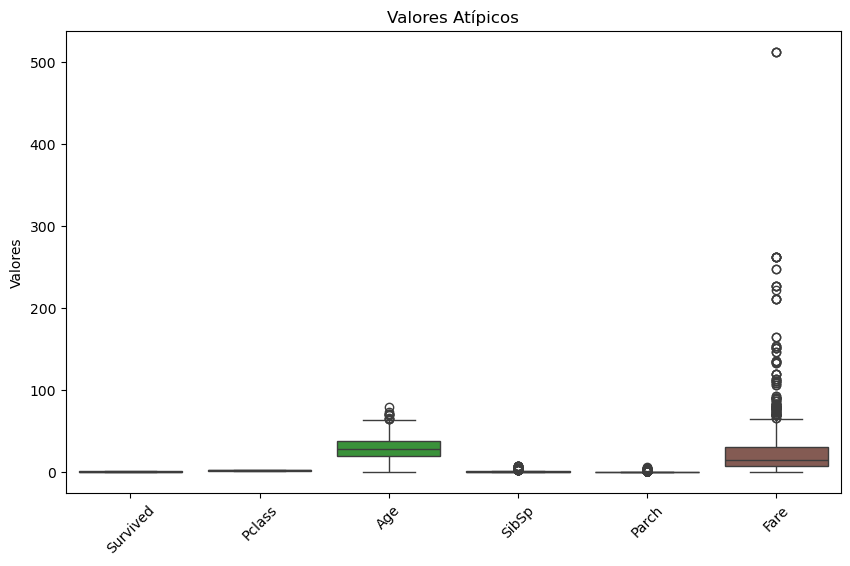

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.xticks(rotation=45)
plt.title('Valores Atípicos')
plt.ylabel('Valores')
plt.show()

## 2. Procesamiento de datos

In [118]:
print(data.isnull().sum()) #COmprobar valores faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [120]:
#Rellenar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin'], inplace=True)

data = pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)

In [122]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


## 3.Selección de características

In [145]:
caract = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
X = data[caract]
y = data['Survived']

## 4. DIvidir DataSet

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## 5. Entrenar el modelo

In [151]:
model = DecisionTreeClassifier(random_state=42) #Crear el modelo
model.fit(X_train,y_train) #Entrenar modelo

DecisionTreeClassifier(random_state=42)

## 6. Evaluar el desempeño del modelo

In [154]:
y_pred = model.predict(X_test) #Predicciones en el conjunto
#Evaluar el modelo
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy:   {Accuracy}')
print(f'Precision:  {Precision}')
print(f'Recall:     {Recall}')
print(f'F1 Score:   {f1}')

Accuracy:   0.7821229050279329
Precision:  0.7272727272727273
Recall:     0.7567567567567568
F1 Score:   0.7417218543046358


## 7. Visualización de los datos

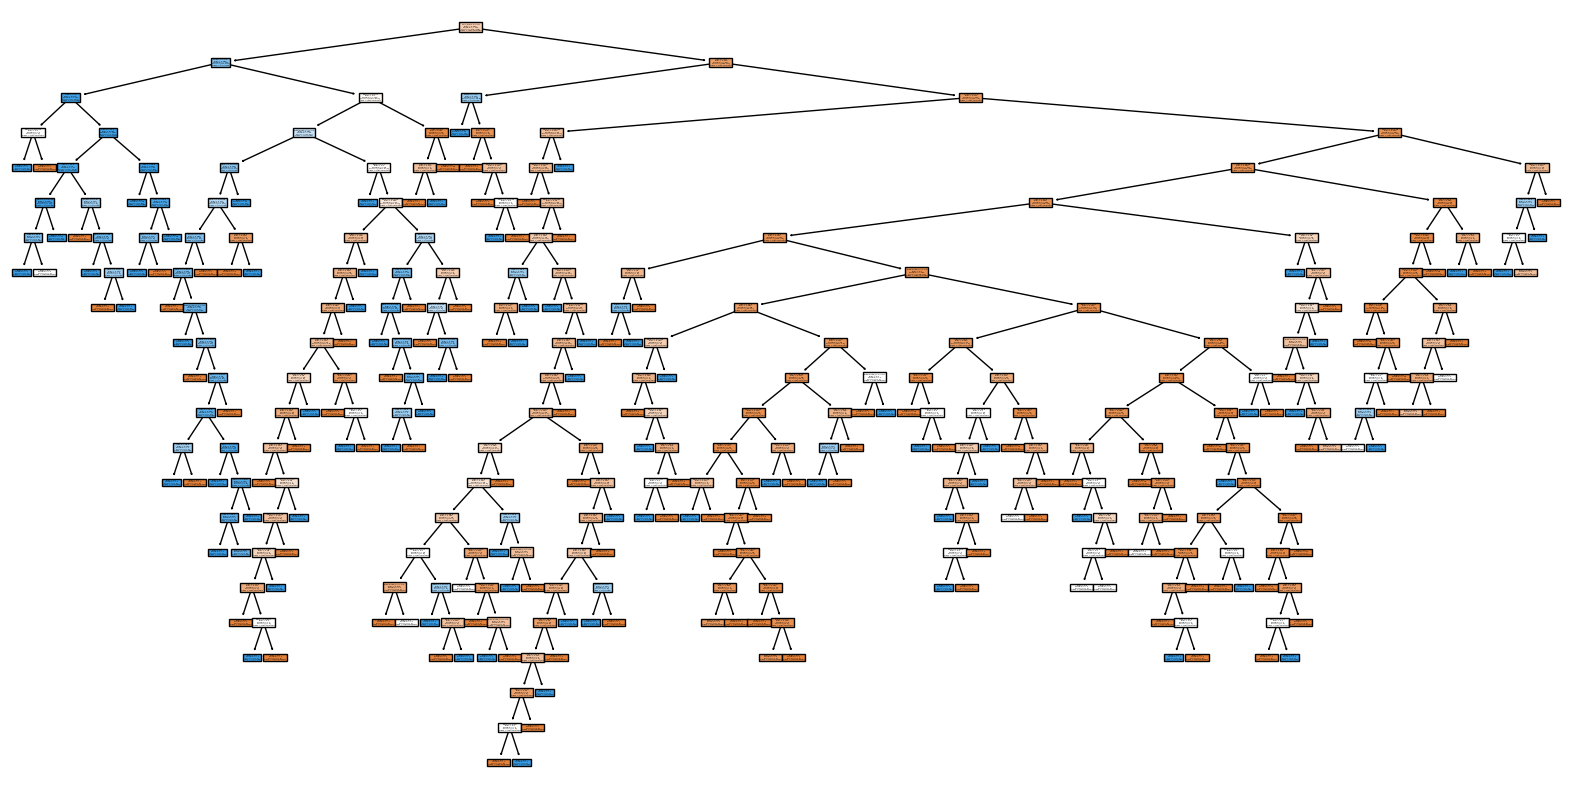

In [157]:
#Visulizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=caract, class_names=['Not Survived','Survived'], filled=True)
plt.show()

## 8. Interpretación y Documentación

"""
La clase del pasajero es una característica importante, ya que los pasajeros de primera clase tenían más probabilidades 
de sobrevivir.
El sexo del pasajero también es crucial, con mujeres teniendo una tasa de supervivencia más alta.
La edad juega un papel importante, con niños pequeños teniendo una mayor probabilidad de ser rescatados.
"""